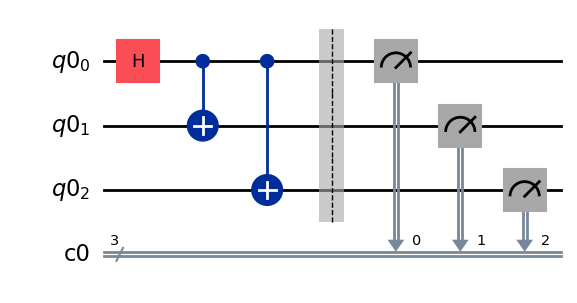

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])

qc.barrier()

qc.measure(q, c)

qc.draw(output='mpl')

In [3]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution

job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)
plot_distribution(counts)

{'000': 492, '111': 508}


In [6]:
from qiskit_aer import QasmSimulator

q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.measure(q[0],c[0])
qc.h(q[1]).c_if(c,0)
qc.measure(q,c)

job = QasmSimulator().run(qc,shots=1024)
counts = job.result().get_counts(qc)
print(counts)

{'01': 1024}


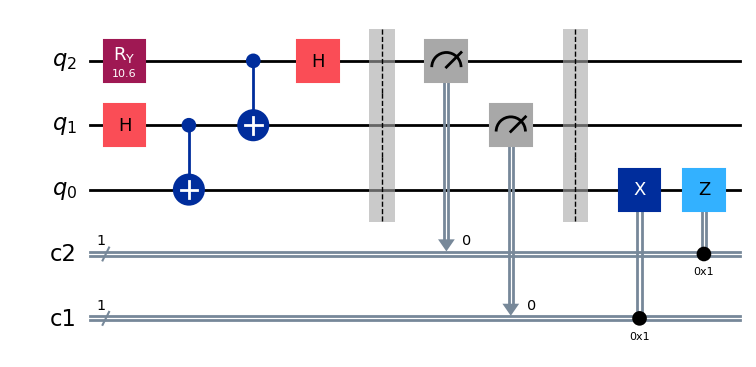

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator
from math import pi
from random import randrange

q =  QuantumRegister(3,"q")
c1 = ClassicalRegister(1,"c1")
c2 = ClassicalRegister(1,"c2")
qc = QuantumCircuit(q,c1,c2)

r = randrange(100)
theta = 2*pi*(r/100)
qc.ry(2*theta,q[2])

qc.h(q[1])
qc.cx(q[1],q[0])

qc.cx(q[2],q[1])

qc.h(q[2])

qc.barrier()

qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

qc.draw(output='mpl', reverse_bits=True)

In [21]:
job = StatevectorSimulator().run(qc,optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc).data
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(round(current_quantum_state[i].real,4))
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])

the state vector is
-0.0
-0.0
0.0
0.0
0.0
-0.0
0.5358
-0.8443

the classical outcome is 11
